In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data**

In [113]:
from sklearn.datasets import load_iris
iris=load_iris()
X= iris.data
y= iris.target
import pandas as pd
X= pd.DataFrame(X)
y= pd.DataFrame(y)

print(X.shape)
X.head()

(150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
X= stand.fit_transform(X)
X= pd.DataFrame(X)
X.columns= iris.feature_names

iris=pd.concat([X, y], axis=1)
iris.columns = [*iris.columns[:-1], 'class']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
X_componant = pd.DataFrame(data = principalComponents
             , columns = ['principal_component1', 'principal_component2'])

print(pca.explained_variance_ratio_)
print(X_componant.shape)
# the first principal component contains 72.96% of the variance and the second principal component contains 23% of the variance
# 72.96% + 23% = 95.80% :should be > 80% to avoid overfitting
X_componant.head()

[0.72962445 0.22850762]
(150, 2)


,principal_component1,principal_component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [116]:
final_data = pd.concat([X_componant, iris[['class']]], axis = 1)

final_data.head()

,principal_component1,principal_component2,class
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


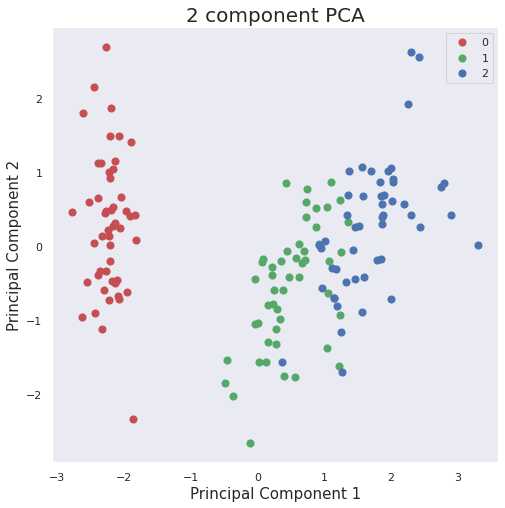

In [117]:
# Visualize 2D Projection
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
fig.add_subplot(1,1,1) 
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_data['class'] == target
    plt.scatter(final_data.loc[indicesToKeep, 'principal_component1']
               , final_data.loc[indicesToKeep, 'principal_component2']
               , c = color
               , s = 50)
              

plt.legend(targets)
plt.grid()
plt.show()

# **Example**

In [127]:
import numpy as np


rn = np.random.RandomState()
x = np.dot(rn.rand(2,2) , rn.randn(2,100) ).T
print(x.shape)
x[:10]

(100, 2)


array([[ 0.50946206,  0.26766433],
       [-0.60017678, -0.35180134],
       [ 1.37530226,  1.57670871],
       [ 0.01798961, -0.22411263],
       [-0.10818787, -0.007188  ],
       [-0.42470097, -0.34824813],
       [-0.76436446, -0.5064932 ],
       [ 0.46325106,  0.23178969],
       [-0.89033104, -1.0316467 ],
       [-0.66279214, -1.06200558]])

In [128]:
from sklearn.decomposition import PCA
model = PCA(n_components= 1)
model.fit(x)
data= model.transform(x)
print(x.shape)
print(data.shape)
data[:10]

(100, 2)
(100, 1)


array([[ 0.59197711],
       [-0.62888072],
       [ 2.13144846],
       [-0.10327707],
       [-0.03785887],
       [-0.50291668],
       [-0.85432497],
       [ 0.53397227],
       [-1.31618593],
       [-1.17770089]])

In [129]:
newdata = model.inverse_transform(data) # transformالبيانات مجمعه قبل ال 
newdata[:10]

array([[ 0.38562403,  0.39023163],
       [-0.47318943, -0.47748566],
       [ 1.46856644,  1.48440153],
       [-0.1034531 , -0.10391606],
       [-0.05743461, -0.05742047],
       [-0.38457992, -0.38795748],
       [-0.63177838, -0.63771879],
       [ 0.34482048,  0.34900504],
       [-0.95667485, -0.96598366],
       [-0.85925743, -0.86755626]])

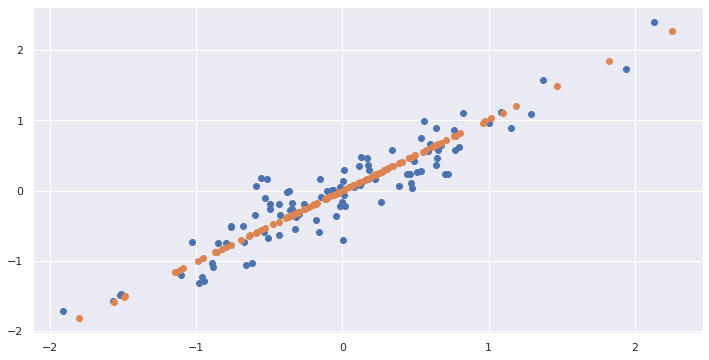

In [130]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(newdata[:,0],newdata[:,1])
